<a href="https://colab.research.google.com/github/amarmohammed398/End-to-end-project-ML/blob/main/lab_3_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch for Neural Networks

### by Mingfei Sun

In this Notebook, we look at the torch library in Python that allows automatic differentiation. PyTorch will be used to implement different neural network models later on.

### Tensors
A tensor generalises the concept of vectors and matrices to an arbitrary number of dimensions. Another name for the same concept is multidimensional arrays. The dimensionality of a tensor is the number of indexes used to refer to scalar values within the tensor. The cell below shows an example initialising a Tensor uniformly for 1D, 2D and 3D:

In [28]:
# We first import the torch library that comes with the Anaconda distribution
import torch
# Tensor 1D presents 1 index
y = torch.rand([2])
print('Tensor 1D presents one index','with shape', y.shape,':\n',y) #get specific size with .shape
# Tensor 2D presents 2 indexes
y = torch.rand([2,3])
print('\nTensor 2D presents two indexes','with shape',y.shape,':\n',y)
#Tensor 3D presents 3 indexes
y = torch.rand([5,2,3])
print('\nTensor 3D presents three indexes','with shape',y.shape,':\n',y)

Tensor 1D presents one index with shape torch.Size([2]) :
 tensor([0.6899, 0.0995])

Tensor 2D presents two indexes with shape torch.Size([2, 3]) :
 tensor([[0.2211, 0.9490, 0.1203],
        [0.7411, 0.4604, 0.9519]])

Tensor 3D presents three indexes with shape torch.Size([5, 2, 3]) :
 tensor([[[0.6421, 0.5099, 0.2323],
         [0.0336, 0.4150, 0.9435]],

        [[0.4972, 0.2168, 0.9518],
         [0.2256, 0.9634, 0.9263]],

        [[0.9732, 0.7900, 0.0636],
         [0.4431, 0.7001, 0.2929]],

        [[0.2154, 0.3038, 0.4121],
         [0.7712, 0.3171, 0.7095]],

        [[0.4492, 0.2100, 0.7161],
         [0.4556, 0.2430, 0.3590]]])


In [29]:
# Create a tensor with specific values
x = torch.tensor([4.0,5.0],dtype=torch.float32)
y = torch.tensor([2.0,3.0],dtype=torch.float32)

# Tensor multiplication (point-wise multiplication)
print(x*y)

tensor([ 8., 15.])


### Initialise a tensor with torch.zeros or torch.ones

In [30]:
x_zeros = torch.zeros([3,4])
print('x_zeros:',x_zeros,'with shape',x_zeros.shape,'\n')
x_ones = torch.ones([2,6])
print('x_ones:',x_ones,'with shape',x_ones.shape)

x_zeros: tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]) with shape torch.Size([3, 4]) 

x_ones: tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]]) with shape torch.Size([2, 6])


### Reshape a tensor using .view

In [31]:
y = torch.ones([3,2])
y_reshaped = y.view(6,1)  # in contrast to the common numpy library, we use .view instead of .reshape
print(y_reshaped)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])


### Numpy interoperability

PyTorch tensors can be converted efficiently to NumPy arrays and vice versa. By doing so, you can leverage the huge swath of functionality in the wider Python ecosystem that has built up around the NumPy array type.

In [32]:
# Tensor_torch to tensor Numpy
Tensor_torch = torch.ones(3,4)
Tensor_numpy = Tensor_torch.numpy() #Returns a NumPy multidim. array of the right size, shape and numerical type.
print('Array in numpy form with shape', Tensor_numpy.shape,':\n',Tensor_numpy)

# Tensor Numpy to Tensor_torch
import numpy as np
Tensor_np = np.random.randn(5,8)
Tensor_numpy_to_torch = torch.from_numpy(Tensor_np)
print('\nArray from Numpy to Torch with shape', Tensor_numpy_to_torch.shape,':\n',Tensor_numpy_to_torch)

Array in numpy form with shape (3, 4) :
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

Array from Numpy to Torch with shape torch.Size([5, 8]) :
 tensor([[ 0.9829,  0.3977,  0.2337, -0.9000,  2.4305, -1.7618, -0.9218, -0.5735],
        [-0.2695, -0.5976, -0.5828,  0.4007, -1.7462, -0.4602, -0.2831,  1.4982],
        [ 1.9383,  0.8949, -1.8129, -0.4535,  0.9713,  0.0459,  0.1488, -0.8580],
        [ 2.5494, -1.2818,  0.9461, -1.5521,  0.8346, -0.0149, -0.8809, -0.6844],
        [-0.0850, -0.0428,  0.1937, -0.2293, -0.2975, -0.6449, -0.5982, -0.5703]],
       dtype=torch.float64)


## Automatic Differentiation

PyTorch allows to automatically obtain the gradients of a tensor with respect to a defined function. When creating the tensor, we have to indicate that it requires the gradient computation using the flag `requires_grad`  

In [33]:
x = torch.rand(3,requires_grad=True)
print(x)

tensor([0.1080, 0.4363, 0.8580], requires_grad=True)


Notice that now the Tensor shows the flag `requires_grad` as True. We can also activate such a flag in a Tensor already created as follows:

In [34]:
x = torch.tensor([1.0,2.0,3.0])
print(x)
x.requires_grad_(True)
print(x)

tensor([1., 2., 3.])
tensor([1., 2., 3.], requires_grad=True)


Let us define a function $y=x^2+5$. The function $y$ will not only carry the result of evaluating $x$, but also the gradient function $\frac{\partial y}{\partial x}$ called `grad_fn` in the new tensor $y$

In [35]:
x = torch.tensor([2.0])
x.requires_grad_(True)  # indicate we will need the gradients with respecto to this variable
y = x**2 + 5
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To evaluate the partial derivative $\frac{\partial y}{\partial x}$, we use the `.backward()` function and the result of the gradient evaluation is stored in `x.grad`

In [36]:
y.backward()  #dy/dx
print('PyTorch gradient:', x.grad)

# Let us compare with the analytical gradient of y = x**2+5
with torch.no_grad():    # this is to only use the tensor value without its gradient information
    dy_dx = 2*x  # analytical gradient
print('Analytical gradient:', dy_dx)

PyTorch gradient: tensor([4.])
Analytical gradient: tensor([4.])


If we evaluate a vector $\mathbf{w}=[w_1, \ldots, w_D]^{\top}$, to compute another vector $\mathbf{g}=[g_1, \ldots, g_D]^{\top}$ with elements $g_i=w_i^2+5$, then we obtain a vector $\mathbf{g}$ that contains each evaluation of the function. If we want to obtain the gradient w.r.t $\mathbf{w}$ by using "g.backward()", we have to bypass a vector of size equal to w.shape to the function, i.e., "g.backward(vect)".

In [37]:
w = torch.tensor([1.0,2.0,3.0])
w.requires_grad_(True)

g = w**2+5
# Below, the values [1.0,1.0,1.0] are multiplied by the gradient g.backward(vect)
# of course using the ones does not modify the value of the gradient
vect = torch.tensor([1.0,1.0,1.0],dtype=torch.float32)
g.backward(vect)
print(w.grad)

tensor([2., 4., 6.])


On the other hand, when accessing the gradients in a for loop, PyTorch acummulates the gradients at each
iteration. In order to avoid this behaviour, we have to use the function .grad.zero_() also at each iteration. See in the example below what happens when commenting and uncommenting the line "w.grad.zero_()":

In [38]:
#Pytorch uses a cumulative process for the gradients
w = torch.tensor([1.0,2.0,3.0])
w.requires_grad_(True)

for i in range(3):
    g = w**2+5
    g.backward(torch.ones_like(w))
    print(w.grad)
    w.grad.zero_()    #this line avoids the acummulation of the gradients uncomment it to see its effect

tensor([2., 4., 6.])
tensor([2., 4., 6.])
tensor([2., 4., 6.])


###  Question 1

Verify that the gradients provided by PyTorch coincide with the analytical gradients of the function $f = \exp \big(-x^2-2x- \sin (x) \big)$ w.r.t $x$.

In [39]:
import torch

# Define x as a tensor
x = torch.tensor(1.0, requires_grad=True)

# Define the function
f = torch.exp(-(x**2 + 2*x + torch.sin(x)))

# Compute PyTorch gradient
f.backward()
grad_torch = x.grad.item()

# Compute analytical gradient (purely in PyTorch)
grad_analytic = - (2*x + 2 + torch.cos(x)) * torch.exp(-(x**2 + 2*x + torch.sin(x)))
grad_analytic = grad_analytic.item()

print("PyTorch gradient:", grad_torch)
print("Analytical gradient:", grad_analytic)
print("Difference:", abs(grad_torch - grad_analytic))


PyTorch gradient: -0.09744400531053543
Analytical gradient: -0.09744400531053543
Difference: 0.0


## Linear Regression Basic Example

We now provide a very simple example of linear regression with one input dimension, $y=wx+b$, and illustrate how we use PyTorch to optimise the parameters of the model

In [40]:
Ndata = 100
x = torch.rand(Ndata)
true_w = 1.5
true_bias = 1.0
# We generate the dataset from the actual model but adding some noise
y = true_w*x + true_bias + 0.05*torch.randn(Ndata)
# We make sure to set the requires_grad flag to True for both paratemers
w = torch.tensor(0.0,dtype=torch.float32,requires_grad=True)
bias = torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

We now define two useful functions, the prediction function and the objective function

In [41]:
def model_prediction(x,w,bias):
    return w*x + bias

def loss_function(y,y_pred):
    return ((y_pred-y)**2).mean()  # Mean Squared Error (MSE)

And we use gradient descent to estimate the parameters of the model

\begin{align*}
    w_{k+1} = w_k - \eta \frac{dE}{dw}\\
    b_{k+1} = b_k - \eta \frac{dE}{db}\\
\end{align*}

We know that there is a closed form solution for $w$ and $b$ through the normal equation. The example is for illustrative purposes.

In [42]:
Max_Niter = 500
step_size = 0.1
for Niter in range(Max_Niter):
    # Evaluate the prediction and the loss
    y_approx = model_prediction(x,w,bias)
    my_loss = loss_function(y,y_approx)

    # The function .backward() has to be called in order to load the grads in w.grad
    # Notice that here it is not necessary to bypass a vector since loss_function is a scalar function
    my_loss.backward()

    with torch.no_grad():        # this line avoids the gradient update while allowing to change the value of w
        w -= step_size * w.grad    # it is necessary to avoid the grad update while modifying the variable
        bias -= step_size * bias.grad

    # Make the zero gradient to avoid acummulation
    w.grad.zero_()
    bias.grad.zero_()

    # We print the loss, and the parameters values every 50 iterations
    if Niter%50==0:
        print(f'Iteration = {Niter+1}, Loss = {my_loss:.8f}, w = {w:.3f}, bias = {bias:.3f}')

print(f'Iteration = {Niter+1}, Loss = {my_loss:.8f}, w = {w:.3f}, bias = {bias:.3f}')

Iteration = 1, Loss = 3.22007465, w = 0.197, bias = 0.349
Iteration = 51, Loss = 0.01567169, w = 1.094, bias = 1.211
Iteration = 101, Loss = 0.00617061, w = 1.282, bias = 1.111
Iteration = 151, Loss = 0.00329224, w = 1.385, bias = 1.056
Iteration = 201, Loss = 0.00242023, w = 1.442, bias = 1.026
Iteration = 251, Loss = 0.00215606, w = 1.474, bias = 1.009
Iteration = 301, Loss = 0.00207603, w = 1.491, bias = 1.000
Iteration = 351, Loss = 0.00205178, w = 1.500, bias = 0.995
Iteration = 401, Loss = 0.00204444, w = 1.506, bias = 0.992
Iteration = 451, Loss = 0.00204221, w = 1.509, bias = 0.991
Iteration = 500, Loss = 0.00204154, w = 1.510, bias = 0.990


We finally plot the result

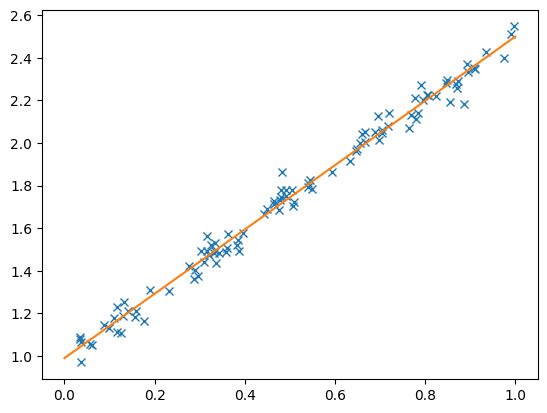

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y,'x')
xtest = torch.linspace(0,1,10)
with torch.no_grad():
    y_pred = model_prediction(xtest,w,bias)
plt.plot(xtest,y_pred)

### Loading a .csv dataset

We can take advantage of the interoperability between Numpy and PyTorch by loading a .csv data as a numpy array and transforming it to a Torch Tensor using `torch.from_numpy(dataset_np)`.

In [44]:
# This cell is simply to download the winequality-red.csv dataset from its root url
import urllib.request
urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', './winequality-red.csv')

('./winequality-red.csv', <http.client.HTTPMessage at 0x7f06ece23050>)

In [45]:
import numpy as np
#In the line below we avoid the first row (skiprows=1) of .csv file that contains names
#the delimeter of data for this dataset is ";"
wine_np = np.loadtxt("./winequality-red.csv",dtype=np.float32,delimiter=";",skiprows=1)
wine_torch = torch.from_numpy(wine_np)  #We take advantage of the interoperability with numpy
wine_torch

tensor([[ 7.4000,  0.7000,  0.0000,  ...,  0.5600,  9.4000,  5.0000],
        [ 7.8000,  0.8800,  0.0000,  ...,  0.6800,  9.8000,  5.0000],
        [ 7.8000,  0.7600,  0.0400,  ...,  0.6500,  9.8000,  5.0000],
        ...,
        [ 6.3000,  0.5100,  0.1300,  ...,  0.7500, 11.0000,  6.0000],
        [ 5.9000,  0.6450,  0.1200,  ...,  0.7100, 10.2000,  5.0000],
        [ 6.0000,  0.3100,  0.4700,  ...,  0.6600, 11.0000,  6.0000]])

# Pytorch for MLPs
We will now use the pytorch library to train the MLPs. We will use a dataset of digits (MNIST).

## Import libraries and load the dataset
If you are using your own computer, you will need to install Pytorch. Setup guidance is here: https://pytorch.org/get-started/locally/)

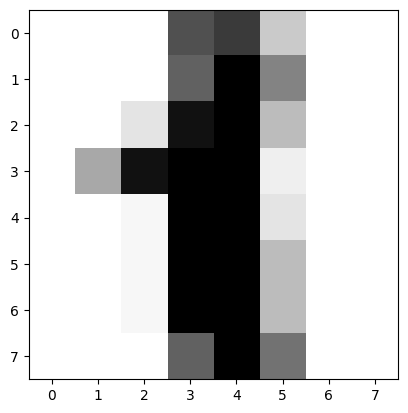

In [46]:
# import pytorch library (load the neural network module as nn, for convenience to save us writing torch.nn every time
import torch
import torch.nn as nn

# import the digits dataset
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
digits = datasets.load_digits()

# get one image
image1 = digits.images[1]
plt.imshow(image1, cmap='Greys')

As we discovered in the previous notebook, pytorch uses tensors as its base unit. So, we will first convert the digits dataset into tensors.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

X_scaled = preprocessing.scale(digits.data) #standardizes the input (mean set to 0 and standard deviation set to 1)

X_scaled_t = torch.from_numpy(X_scaled)
#X_scaled_t = torch.transpose(X_scaled_t,0,1)
y_t = torch.from_numpy(digits.target)

In the previous part, we explicitly wrote a function called *model_prediction* that described a linear regression model. We apply the same process here, but the model is a little more complex, so we use some of the inbuilt functions within Pytorch. The following code sets up a 1 hidden layer neural network with 20 neurons.

(You may have noticed that we have set up a class, rather than a function (def) here. Broadly, a class is an object that can have many functions applied to it. The nature of an Object is beyond the scope of this course, and if you are interested you should investigate material on object oriented programming).

In [73]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.input_size = input_size

        # first hidden layer (input → 20)
        self.fc1 = nn.Linear(input_size, 20)

        # second hidden layer (20 → 20)
        self.fc2 = nn.Linear(20, 20)

        # output layer (20 → 10 classes)
        self.fc3 = nn.Linear(20, 10)

        # activations
        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Layer 1
        x = self.fc1(x)
        x = self.tanh(x)          # tanh activation for first hidden layer

        # Layer 2
        x = self.fc2(x)
        x = self.sigmoid(x)       # sigmoid activation for second hidden layer

        # Output layer (no activation, since we’ll usually apply CrossEntropyLoss)
        output = self.fc3(x)
        return output



Rather that explicitly writing out a loss function, we will use pytorch's inbuilt CrossEntropy loss.

In [70]:
loss_func = nn.CrossEntropyLoss()

We now create a training function - if you compare this to the previous part, you should see that it follows the same basic structure as the linear regression example.

The only exception is that we set the neural network into *train* mode using mlp.train. This is because some more advanced modifications to a neural network (e.g. batch normalisation) perform differently during training and running.

In [71]:
def train(num_epochs, network, X_train, y_train, tolerance=1e-4, patience=5):
    """
    Train function with dynamic epoch control based on change in loss.

    Args:
        num_epochs (int): Maximum number of epochs to train for.
        network (torch.nn.Module): The neural network model.
        X_train (Tensor): Training data.
        y_train (Tensor): Training labels.
        tolerance (float): Minimum relative change in loss to continue training.
        patience (int): Number of consecutive small changes allowed before stopping.
    """
    network.train()
    prev_loss = None
    stable_count = 0  # counts how many times loss change < tolerance

    for epoch in range(num_epochs):
        output = network(X_train)
        loss = loss_func(output, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        current_loss = loss.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {current_loss:.6f}")


        # check if the change in loss is small
        if prev_loss is not None:
            change = abs(prev_loss - current_loss) / (prev_loss + 1e-8)
            if change < tolerance:
                stable_count += 1
                print(f"  ↳ Small change in loss ({change:.6f}), patience {stable_count}/{patience}")
            else:
                stable_count = 0  # reset if we see a meaningful change

            # stop early if loss has not improved for 'patience' consecutive epochs
            if stable_count >= patience:
                print(f"\nEarly stopping at epoch {epoch+1} due to minimal loss change.")
                break

        prev_loss = current_loss

    # After training, print predicted and true labels
    print("\nFinal predictions vs true labels:")
    print(torch.argmax(output, 1))
    print(y_train)


In [72]:
input_size = X_scaled_t.size(1) # input size is the same size as a digits image (8x8)
mlp = MLP(input_size) # set up an instance of the MLP object
mlp = mlp.double()

# use the adam optimiser to do the updates - this is a modern update to classic stochastic gradient descent
from torch import optim
optimizer = optim.Adam(mlp.parameters(), lr = 0.005)

# call the training function and run over 1000 epochs
num_epochs = 100
train(num_epochs, mlp, X_scaled_t, y_t.long(), tolerance=1e-3, patience=1)

Epoch [1/100], Loss: 2.324835
Epoch [2/100], Loss: 2.300835
Epoch [3/100], Loss: 2.279138
Epoch [4/100], Loss: 2.258483
Epoch [5/100], Loss: 2.237699
Epoch [6/100], Loss: 2.215929
Epoch [7/100], Loss: 2.192667
Epoch [8/100], Loss: 2.167630
Epoch [9/100], Loss: 2.140658
Epoch [10/100], Loss: 2.111676
Epoch [11/100], Loss: 2.080661
Epoch [12/100], Loss: 2.047635
Epoch [13/100], Loss: 2.012655
Epoch [14/100], Loss: 1.975819
Epoch [15/100], Loss: 1.937265
Epoch [16/100], Loss: 1.897173
Epoch [17/100], Loss: 1.855760
Epoch [18/100], Loss: 1.813274
Epoch [19/100], Loss: 1.769978
Epoch [20/100], Loss: 1.726136
Epoch [21/100], Loss: 1.682003
Epoch [22/100], Loss: 1.637810
Epoch [23/100], Loss: 1.593759
Epoch [24/100], Loss: 1.550019
Epoch [25/100], Loss: 1.506726
Epoch [26/100], Loss: 1.463985
Epoch [27/100], Loss: 1.421874
Epoch [28/100], Loss: 1.380453
Epoch [29/100], Loss: 1.339770
Epoch [30/100], Loss: 1.299866
Epoch [31/100], Loss: 1.260775
Epoch [32/100], Loss: 1.222531
Epoch [33/100], L

## Questions
**Q1** Has the model finished training? (How can you tell whether it has or not?)
- Green tick of completion with no errors displayed. The output is being displayed with each Epoch and loss displayed. The final print statments with the actual value and predicted value is ouputed at the end as expected.

**Q2** Modify the *train* function above to dynamically set the number of training epochs, depending on the change in loss between iterations
- Updated code see above

**Q3** The size (number of neurons) of the hidden layer is 20. Try changing this - how does this affect the loss?
- Loss is decreased

**Q4** Try adding an additional hidden layer of size 20 with *tanh activation* - you will need to make sure that the size of the inputs and outputs of each layer match up


# MLP for XOR classification
In the lecture, we showed that the MLP can be used for XOR classification (A Toy Example on which the logistic regression fails completely). You'll need to implement this classification by using MLP.

We first give you a demo code that show that Logistic Regression can't solve the XOR problem. To do this, we first generate the XOR samples.

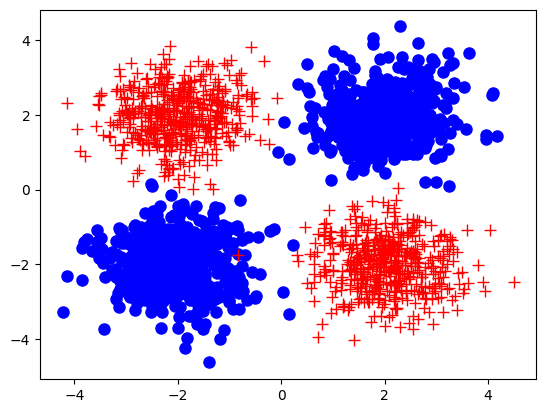

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import cholesky
from sklearn.linear_model import LogisticRegression

np.random.seed(12)

def gaussSample(mu, sigma, n):
    A = cholesky(sigma)
    Z = np.random.normal(loc=0, scale=1, size=(len(mu), n))
    return np.dot(A, Z).T + mu

def sqDistance(p, q):
    pSOS = np.sum(p ** 2, axis=1)
    qSOS = np.sum(q ** 2, axis=1)
    pSOS = np.repeat(pSOS[..., np.newaxis], len(qSOS), axis=1)
    dist = pSOS + qSOS - 2 * np.dot(p, q.T)
    return dist

def kernelRbfSigma(X1, X2, sigma):
    Z = 1.0 / np.sqrt(2 * np.pi * sigma ** 2)
    S = sqDistance(X1, X2)
    K = Z * np.exp(-1 / (2 * sigma ** 2) * S)
    return K

def createXORdata(doplot=False, N=500):
    off1 = gaussSample([-2, -2], 0.5 * np.eye(2), N)
    off2 = gaussSample([2, 2], 0.5 * np.eye(2), N)
    on1 = gaussSample([-2, 2], 0.5 * np.eye(2), N)
    on2 = gaussSample([2, -2], 0.5 * np.eye(2), N)
    X = np.concatenate([off1, off2, on1, on2], axis=0)
    y = np.concatenate([np.zeros((len(off1) + len(off2))), np.ones((len(on1) + len(on2)))], axis=0)

    if doplot:
        plt.plot(X[y == 0, 0], X[y == 0, 1], 'ob', markersize=8)
        plt.plot(X[y == 1, 0], X[y == 1, 1], '+r', markersize=8)
        plt.show()
    return X, y

X, y = createXORdata(True)

We now use LogisticRegression to solve this classification task.

Text(0.5, 1.0, 'Simple Logistic regression')

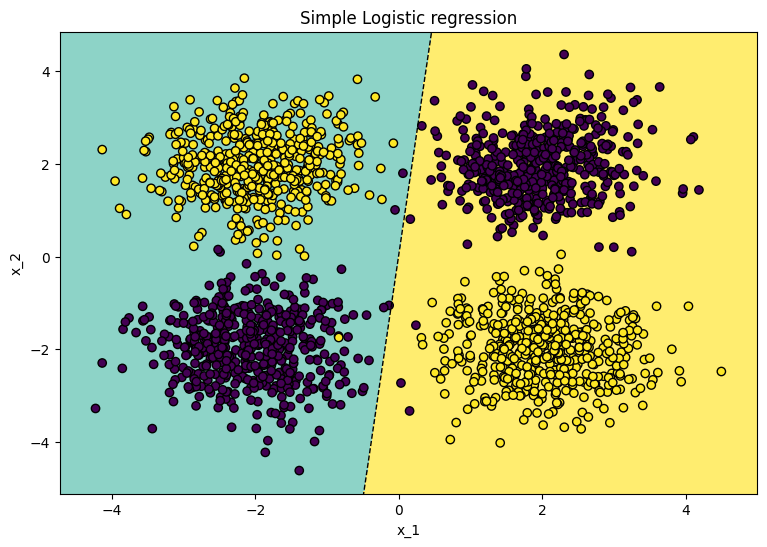

In [53]:
tol = 1e-2

model = LogisticRegression(tol=tol)
model.fit(X, y)
ypred = model.predict(X)
errorRate = np.mean(ypred != y)

clf = LogisticRegression()
clf.fit(X, y)

fig, ax1 = plt.subplots(1, 1, figsize=(9, 6))
# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b / w2
m = -w1 / w2

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xd = np.array([x_min, x_max])
yd = m * xd + c
ax1.plot(xd, yd, 'k', lw=1, ls='--')
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot_raw = np.c_[xx.ravel(), yy.ravel()]

Z = clf.predict(X_plot_raw)

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# plot the decision boundary
ax1.pcolormesh(xx, yy, Z, cmap='Set3')

# Plot also the training points
ax1.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_ylabel(r'x_2')
ax1.set_xlabel(r'x_1')
ax1.set_title('Simple Logistic regression')

Your task is to implement the MLP defined in the lecture using Pytorch to solve this classification task.  

In [54]:
# remove the following line and put your codes here
assert False

AssertionError: 

Train your MLPs. You'll need to plot the scatter plot of $(a_1^{(2)}, a_2^{(2)})$, and the decision boundary. Discuss how the distribution of $(a_1^{(1)}, a_1^{(2)})$ would be different that of $(x_1, x_2)$.  

In [ ]:
# put your answers here